## Тема “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = load_boston()
X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
y = pd.DataFrame(dataset['target'], columns=['TARGET'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
# Разбиение выборки, в тестовую 20%, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Масштабируйте данные с помощью StandardScaler.
scaler = StandardScaler()
X_columns = X_train.columns
# т.к. скеллер возвращает массив необходимо преобразовать его в пандас дф
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_columns)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [36]:
# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.
model_tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = model_tsne.fit_transform(X_train_scaled)

Text(0.5, 1.0, 'диаграмма рассеяния')

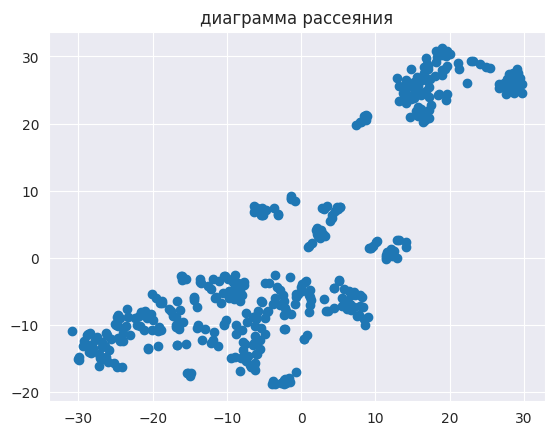

In [37]:
# Постройте диаграмму рассеяния на этих данных.
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.title('диаграмма рассеяния')

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [38]:
model_kmeans = KMeans(max_iter=100, random_state=42, n_clusters=3)
clusters = model_kmeans.fit_predict(X_train_scaled)
set(clusters)

{0, 1, 2}

Text(0.5, 1.0, 'диаграмма рассеяния')

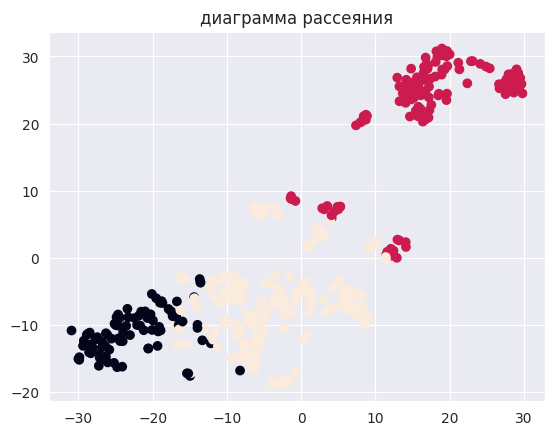

In [39]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=clusters)
plt.title('диаграмма рассеяния')

In [40]:
# Вычислите средние значения price и CRIM в разных кластерах
for cl in set(clusters):
    print('-'*10)
    print(f'Кластер №{cl}')
    print('Средний price: ', float(y_train[clusters==cl].mean()))
    print('Средний CRIM: ', X_train['CRIM'][clusters==cl].mean())


----------
Кластер №0
Средний price:  27.78837209302326
Средний CRIM:  0.07356558139534884
----------
Кластер №1
Средний price:  16.165354330708663
Средний CRIM:  10.797028425196851
----------
Кластер №2
Средний price:  24.958115183246072
Средний CRIM:  0.4216602094240837


### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [49]:
X_test_tsne = model_tsne.fit_transform(X_test_scaled)
test_clusters = model_kmeans.fit_predict(X_test_scaled)
set(test_clusters)

{0, 1, 2}

In [50]:
for cl in set(test_clusters):
    print('-'*10)
    print(f'Кластер №{cl}')
    print('Средний price: ', float(y_test[test_clusters==cl].mean()))
    print('Средний CRIM: ', X_test['CRIM'][test_clusters==cl].mean())


----------
Кластер №0
Средний price:  33.871428571428574
Средний CRIM:  0.08618571428571427
----------
Кластер №1
Средний price:  21.552830188679245
Средний CRIM:  0.25200716981132076
----------
Кластер №2
Средний price:  16.43714285714286
Средний CRIM:  10.165531142857143


Text(0.5, 1.0, 'диаграмма рассеяния')

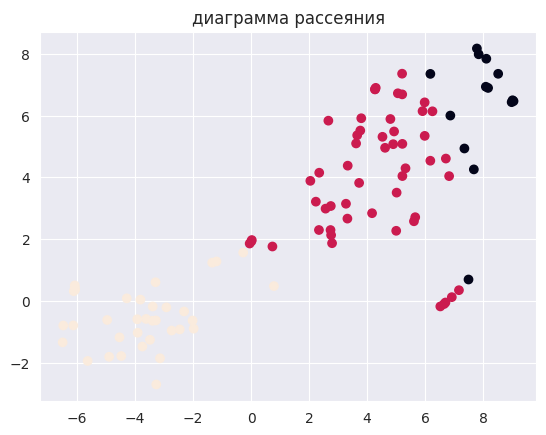

In [51]:
# а как же диаграмма?)))
plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1], c=test_clusters)
plt.title('диаграмма рассеяния')